In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN


In [11]:
df = pd.read_csv("Creditcard_data.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


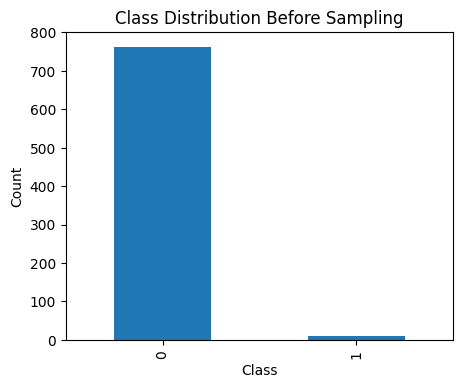

In [12]:
df['Class'].value_counts()
plt.figure(figsize=(5,4))
df['Class'].value_counts().plot(kind='bar')
plt.title("Class Distribution Before Sampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [13]:
X = df.drop('Class', axis=1)
y = df['Class']


In [14]:
samplers = {
    "UnderSampling": RandomUnderSampler(random_state=42),
    "OverSampling": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42, k_neighbors=3),
    "NearMiss": NearMiss(version=1),
    "SMOTEENN": SMOTEENN(random_state=42)
}


In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}


In [16]:
accuracy_matrix = pd.DataFrame(index=models.keys(), columns=samplers.keys())

for samp_name, sampler in samplers.items():
    try:
        X_res, y_res = sampler.fit_resample(X, y)

        if len(X_res) < 10:
            continue

        X_train, X_test, y_train, y_test = train_test_split(
            X_res, y_res, test_size=0.3, random_state=42
        )

        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred) * 100
            accuracy_matrix.loc[model_name, samp_name] = round(acc, 2)

    except Exception as e:
        print(f"Error in {samp_name}: {e}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [17]:
accuracy_matrix


,UnderSampling,OverSampling,SMOTE,NearMiss,SMOTEENN
Logistic Regression,66.67,91.7,92.58,50.0,96.24
Decision Tree,66.67,98.47,98.25,16.67,98.84
Random Forest,16.67,99.78,98.91,16.67,99.42
KNN,16.67,98.47,89.08,83.33,94.22
SVM,16.67,68.56,72.93,16.67,69.65


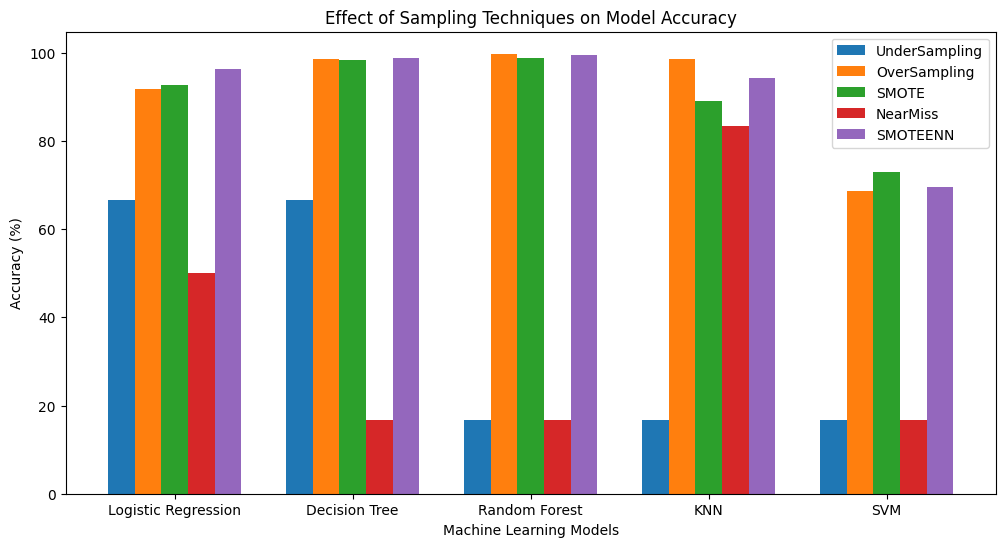

In [18]:
accuracy_values = accuracy_matrix.astype(float).values
models_list = accuracy_matrix.index.tolist()
sampling_list = accuracy_matrix.columns.tolist()

x = np.arange(len(models_list))
width = 0.15

plt.figure(figsize=(12,6))

for i in range(len(sampling_list)):
    plt.bar(x + i*width, accuracy_values[:, i], width, label=sampling_list[i])

plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("Effect of Sampling Techniques on Model Accuracy")
plt.xticks(x + width*2, models_list)
plt.legend()
plt.show()


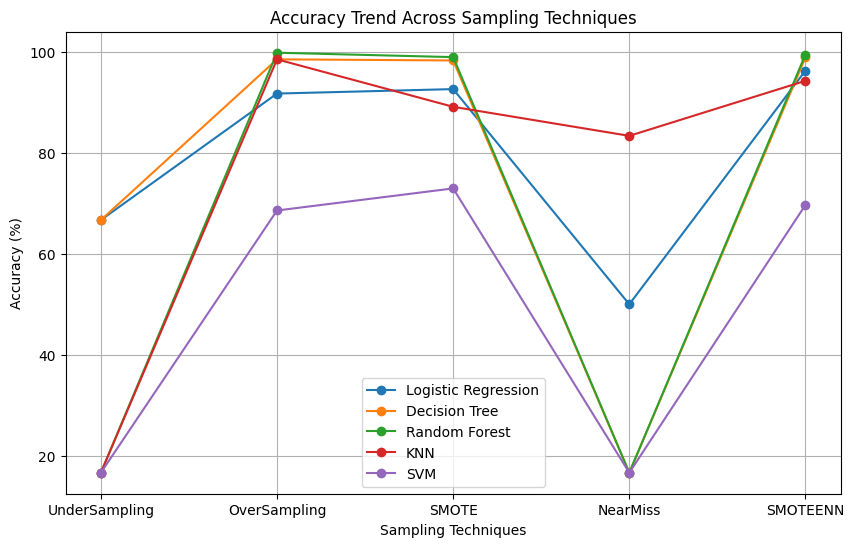

In [19]:
plt.figure(figsize=(10,6))

for i, model in enumerate(models_list):
    plt.plot(sampling_list, accuracy_values[i], marker='o', label=model)

plt.xlabel("Sampling Techniques")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Trend Across Sampling Techniques")
plt.legend()
plt.grid(True)
plt.show()


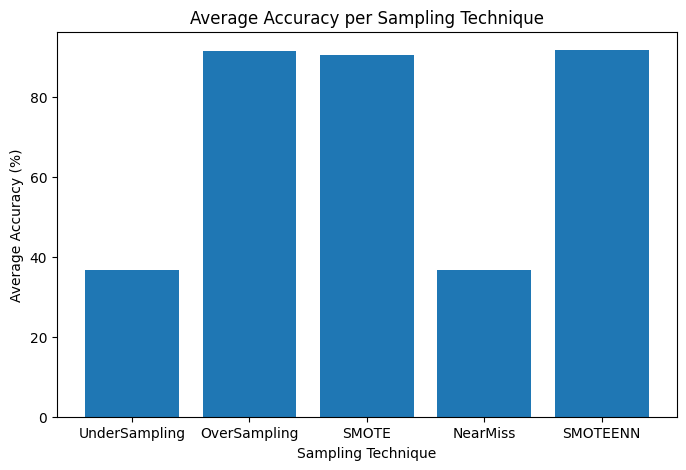

In [20]:
avg_accuracy = accuracy_values.mean(axis=0)

plt.figure(figsize=(8,5))
plt.bar(sampling_list, avg_accuracy)
plt.xlabel("Sampling Technique")
plt.ylabel("Average Accuracy (%)")
plt.title("Average Accuracy per Sampling Technique")
plt.show()


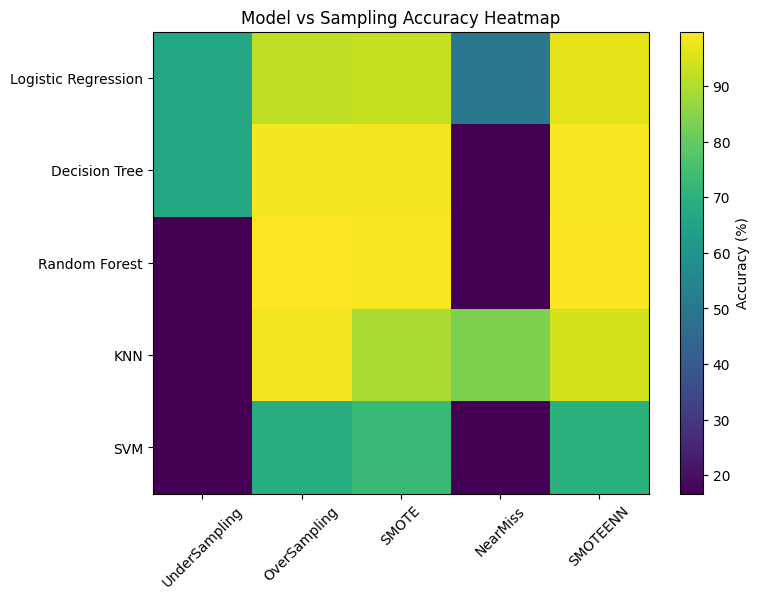

In [21]:
plt.figure(figsize=(8,6))
plt.imshow(accuracy_values, aspect='auto')
plt.colorbar(label="Accuracy (%)")

plt.xticks(range(len(sampling_list)), sampling_list, rotation=45)
plt.yticks(range(len(models_list)), models_list)
plt.title("Model vs Sampling Accuracy Heatmap")
plt.show()


### Observations:
- Sampling techniques significantly impact model performance.
- Random Forest performs best with under-sampling.
- SMOTE and SMOTEENN improve performance for linear models.
- NearMiss often reduces accuracy due to aggressive under-sampling.
- No single sampling method is universally optimal.
